In [226]:
# Importing Libraries 
import os, sys
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 


from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [225]:
! pip install statsmodels


  Using cached statsmodels-0.13.2-cp37-cp37m-win_amd64.whl (9.0 MB)
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)


In [168]:
DATA_DIR = r'D:\Projects_new\Stores_Sales_Prediction\Data'
TRAIN_DATA_FILE_NAME = 'Train.csv'
TEST_DATA_FILE_NAME = 'Test.csv'

# Creating File Path
TRAIN_FILE_PATH = os.path.join(DATA_DIR,TRAIN_DATA_FILE_NAME)
TEST_FILE_PATH = os.path.join(DATA_DIR,TEST_DATA_FILE_NAME)

In [169]:
# Reading Train_file

train_df = pd.read_csv(TRAIN_FILE_PATH)
train_df.head(10)

# Will not Use Test File


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [170]:
#Checking info from Train_df 
train_df.info()
print('*'*40)
print(f'Train Dataframe shape {train_df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
****************************************
Trai

## Observations on Dataframe
1. Dataframe has 8523 Rows of data and 12 columns 
2. Some columns contains missing values 
3. Target column is 'Item_Outlet_sales' 
4. Has 5 Numerical columns and 7 Categorical Columns 

In [171]:
# function to get numerical and categorical columns 
def Numerical_categorical_column(dataframe):
    '''
    This function returns the numerical and categorical column 
    return numerical_columns,categorical_columns
    '''
    numerical_columns = [i for i in dataframe.columns if  dataframe[i].dtype != 'O']
    categorical_columns = [i for i in dataframe.columns if  dataframe[i].dtype == 'O']
    return numerical_columns,categorical_columns

In [172]:
numerical_columns,categorical_columns = Numerical_categorical_column(train_df)
print(numerical_columns)
print(categorical_columns)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [173]:
numerical_df = train_df[numerical_columns]
categorical_df = train_df[categorical_columns]

# We First work on Numerical Columns 

In [174]:
numerical_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [175]:
# Check null values 
numerical_df.isnull().mean()

Item_Weight                  0.171653
Item_Visibility              0.000000
Item_MRP                     0.000000
Outlet_Establishment_Year    0.000000
Item_Outlet_Sales            0.000000
dtype: float64

## Observations 
1. if we are going to apply simple models then scaling on data is required 
2. Item_weight has 1463 missing values which are 17 % of total data, needs to be handled 
3. Outlet_Estabishment_year is time data 
4. Item_outlet_sales is our target data

<AxesSubplot:xlabel='Item_Weight'>

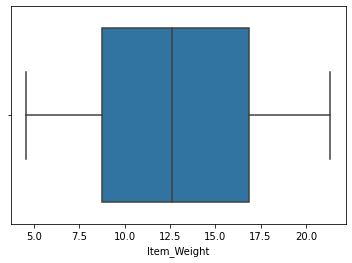

In [176]:
# Handling Missing Values in Item Weight data
sns.boxplot(x=numerical_df['Item_Weight'])

Above Figure shows Item_Weight don't have any outliers 

In [177]:
''' We have two imputation to handle the missing values 
1. Mean/Median/Mode Imputation
2. Random Sampling imputaion '''

def mean_median_mode_imputer(dataframe,column_name,strategy = 'mean'):
    """
    Default strategy to handle missing values is mean 
    Provide dataframe and column_name
    You can use other strategy like mean/median/mode/random
    """
    if strategy == 'median':
        dataframe[column_name] = dataframe[column_name].fillna(dataframe[column_name].median())
    elif strategy == 'mode':
        dataframe[column_name] = dataframe[column_name].fillna(dataframe[column_name].mode())
    elif strategy == 'random':
        dataframe[column_name+'_random'] = dataframe[column_name]
        random_sample_value = dataframe[column_name].dropna().sample(dataframe[column_name].isnull().sum(),random_state=0)
        random_sample_value.index = dataframe[dataframe[column_name].isnull()].index
        dataframe.loc[dataframe[column_name].isnull(),column_name+'_random'] =random_sample_value
        dataframe.drop(columns=[column_name])
    else:
        dataframe[column_name] = dataframe[column_name].fillna(dataframe[column_name].mean())
    

In [178]:
numerical_df.isnull().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [179]:
mean_median_mode_imputer(dataframe=numerical_df,column_name='Item_Weight',strategy='random')

D:\Projects_new\Stores_Sales_Prediction\sales_prize\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Projects_new\Stores_Sales_Prediction\sales_prize\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [180]:
numerical_df.isnull().sum()


Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
Item_Weight_random              0
dtype: int64

In [181]:
numerical_df.drop(columns=['Item_Weight'],inplace=True)
numerical_df.rename(columns = {'Item_Weight_random':'Item_Weight'}, inplace = True)
numerical_df

D:\Projects_new\Stores_Sales_Prediction\sales_prize\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
D:\Projects_new\Stores_Sales_Prediction\sales_prize\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight
0,0.016047,249.8092,1999,3735.1380,9.300
1,0.019278,48.2692,2009,443.4228,5.920
2,0.016760,141.6180,1999,2097.2700,17.500
3,0.000000,182.0950,1998,732.3800,19.200
4,0.000000,53.8614,1987,994.7052,8.930
...,...,...,...,...,...
8518,0.056783,214.5218,1987,2778.3834,6.865
8519,0.046982,108.1570,2002,549.2850,8.380
8520,0.035186,85.1224,2004,1193.1136,10.600
8521,0.145221,103.1332,2009,1845.5976,7.210


In [182]:
numerical_df


,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight
0,0.016047,249.8092,1999,3735.1380,9.300
1,0.019278,48.2692,2009,443.4228,5.920
2,0.016760,141.6180,1999,2097.2700,17.500
3,0.000000,182.0950,1998,732.3800,19.200
4,0.000000,53.8614,1987,994.7052,8.930
...,...,...,...,...,...
8518,0.056783,214.5218,1987,2778.3834,6.865
8519,0.046982,108.1570,2002,549.2850,8.380
8520,0.035186,85.1224,2004,1193.1136,10.600
8521,0.145221,103.1332,2009,1845.5976,7.210


D:\Projects_new\Stores_Sales_Prediction\sales_prize\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

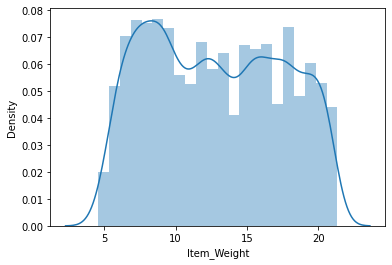

In [183]:
#Checking Distribution 
sns.distplot(numerical_df['Item_Weight'])

# So By using Random sampling imputation distribution not changed 


# Handling Missing Values in Categorical Columns 

In [185]:
categorical_df

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [186]:
# Checking Null Values 
categorical_df.isnull().sum().sort_values()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Location_Type       0
Outlet_Type                0
Outlet_Size             2410
dtype: int64

## Outlet_size has 28% of missing values(2140 missing Values)

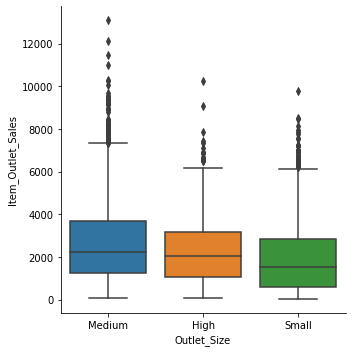

In [189]:
sns.catplot(x="Outlet_Size", y='Item_Outlet_Sales', kind="box", data=train_df)


In [190]:
 mean_median_mode_imputer(dataframe=categorical_df,column_name='Outlet_Size',strategy='random')

D:\Projects_new\Stores_Sales_Prediction\sales_prize\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Projects_new\Stores_Sales_Prediction\sales_prize\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
D:\Projects_new\Stores_Sales_Prediction\sales_prize\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

In [191]:
categorical_df

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Size_random
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,Medium
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,Medium
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,Medium
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,Small
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,High
...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1,High
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1,Small
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1,Small
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2,Medium


In [192]:
categorical_df.drop(columns=['Outlet_Size'],inplace=True)
categorical_df.rename(columns = {'Outlet_Size_random':'Outlet_Size'}, inplace = True)
categorical_df

D:\Projects_new\Stores_Sales_Prediction\sales_prize\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
D:\Projects_new\Stores_Sales_Prediction\sales_prize\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Outlet_Size
0,FDA15,Low Fat,Dairy,OUT049,Tier 1,Supermarket Type1,Medium
1,DRC01,Regular,Soft Drinks,OUT018,Tier 3,Supermarket Type2,Medium
2,FDN15,Low Fat,Meat,OUT049,Tier 1,Supermarket Type1,Medium
3,FDX07,Regular,Fruits and Vegetables,OUT010,Tier 3,Grocery Store,Small
4,NCD19,Low Fat,Household,OUT013,Tier 3,Supermarket Type1,High
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,Tier 3,Supermarket Type1,High
8519,FDS36,Regular,Baking Goods,OUT045,Tier 2,Supermarket Type1,Small
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Tier 2,Supermarket Type1,Small
8521,FDN46,Regular,Snack Foods,OUT018,Tier 3,Supermarket Type2,Medium


In [199]:
print('Numerical Coloumns ')
print(numerical_df.isnull().sum())
print('--' * 60)
print('categorical Coloumns ')
print(categorical_df.isnull().sum())

Numerical Coloumns 
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
Item_Weight                  0
dtype: int64
------------------------------------------------------------------------------------------------------------------------
categorical Coloumns 
Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Location_Type    0
Outlet_Type             0
Outlet_Size             0
dtype: int64


# Successfully Handled Missing Values 

# EDA
1. Missing value detect (Completed)
2. All numerical variables (Completed)
3. Distributon of data
4. Categorical variables (Completed)
5. Outliers
6. Relationship between independent and dependent features
7. Correlations

# Distribution of Data 

In [207]:
train_df = pd.concat([numerical_df,categorical_df],axis=1)

array([[<AxesSubplot:title={'center':'Item_Visibility'}>,
        <AxesSubplot:title={'center':'Item_MRP'}>],
       [<AxesSubplot:title={'center':'Outlet_Establishment_Year'}>,
        <AxesSubplot:title={'center':'Item_Outlet_Sales'}>],
       [<AxesSubplot:title={'center':'Item_Weight'}>, <AxesSubplot:>]],
      dtype=object)

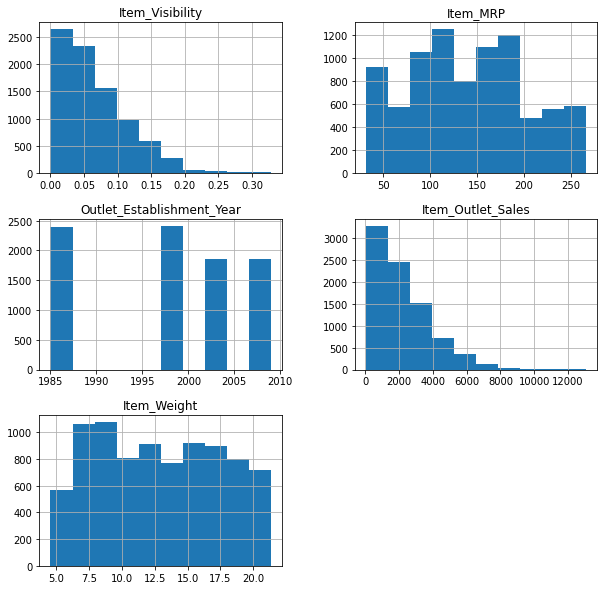

In [212]:
train_df.hist(figsize=(10,10))

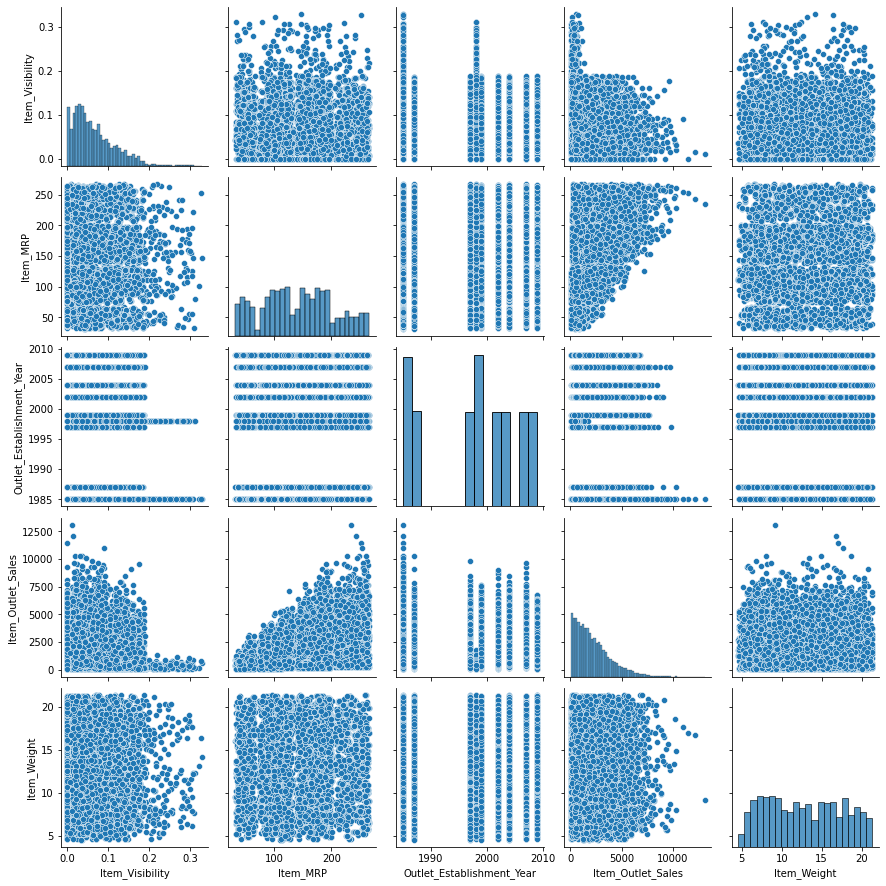

In [213]:
sns.pairplot(train_df)

<AxesSubplot:>

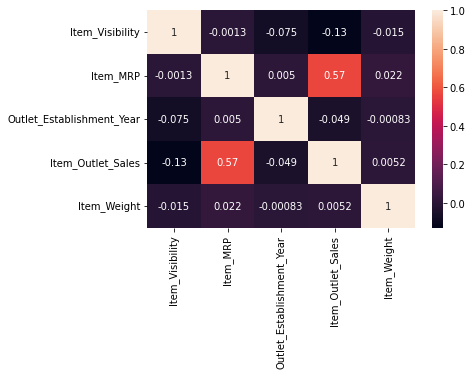

In [216]:
train_df_correlation = train_df.corr()
sns.heatmap(train_df_correlation,annot=True)

In [222]:
numerical_df.isnull().sum()

Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
Item_Weight                  0
dtype: int64

In [227]:
## scaling the data while calculating vif score
def vif_score(data,col):
    y = data[col]
    X = data.drop([col],axis=1)
    scalar = StandardScaler()
    X_scaled = scalar.fit_transform(X)
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
    vif["Features"] = X.columns
    return vif


vif_score(numerical_df,'Item_Outlet_Sales')

,VIF,Features
0,1.005862,Item_Visibility
1,1.000501,Item_MRP
2,1.005660,Outlet_Establishment_Year
3,1.000704,Item_Weight


# Observations
1. Item_MRP is most imp feature 
2. No coreelation observer between features as VIF Score <10

# Outliers 

<AxesSubplot:>

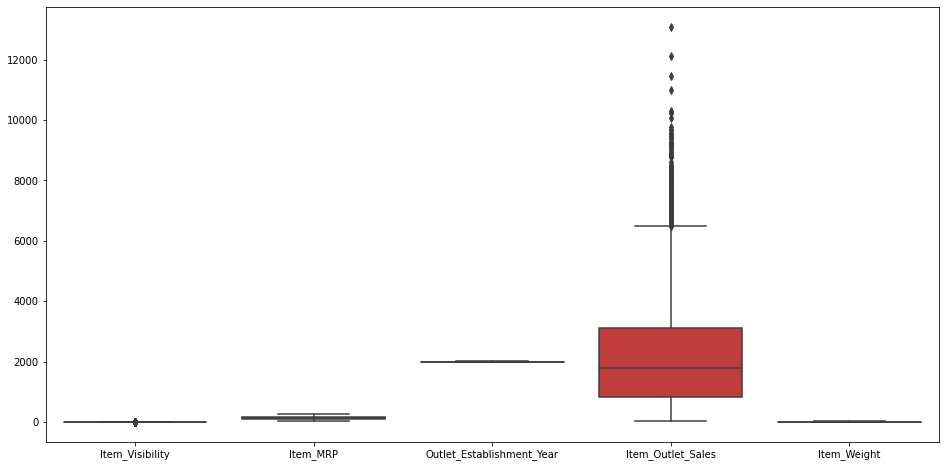

In [229]:
f, ax = plt.subplots(figsize=(16, 8))

sns.boxplot(data=train_df)

# No Outliers Present 

In [235]:

for i in categorical_columns:
    print(f'{i} : {categorical_df[i].unique()} : {len(categorical_df[i].unique())}')
    print('-'*120)

Item_Identifier : ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] : 1559
------------------------------------------------------------------------------------------------------------------------
Item_Fat_Content : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] : 5
------------------------------------------------------------------------------------------------------------------------
Item_Type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] : 16
------------------------------------------------------------------------------------------------------------------------
Outlet_Identifier : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'] : 10
------------------------------------------------------------------------------------------------------------------------
Outlet_Size : ['Medium

In [236]:
train_df['Item_Fat_Content'].value_counts()
# we need to fix this because some values are repeted with other name 


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [238]:
train_df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [239]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [240]:
 train_df['Years_Established'] = train_df['Outlet_Establishment_Year'].apply(lambda x: 2020 - x) 


In [241]:
train_df

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Outlet_Size,Years_Established
0,0.016047,249.8092,1999,3735.1380,9.300,FDA15,Low Fat,Dairy,OUT049,Tier 1,Supermarket Type1,Medium,21
1,0.019278,48.2692,2009,443.4228,5.920,DRC01,Regular,Soft Drinks,OUT018,Tier 3,Supermarket Type2,Medium,11
2,0.016760,141.6180,1999,2097.2700,17.500,FDN15,Low Fat,Meat,OUT049,Tier 1,Supermarket Type1,Medium,21
3,0.000000,182.0950,1998,732.3800,19.200,FDX07,Regular,Fruits and Vegetables,OUT010,Tier 3,Grocery Store,Small,22
4,0.000000,53.8614,1987,994.7052,8.930,NCD19,Low Fat,Household,OUT013,Tier 3,Supermarket Type1,High,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.056783,214.5218,1987,2778.3834,6.865,FDF22,Low Fat,Snack Foods,OUT013,Tier 3,Supermarket Type1,High,33
8519,0.046982,108.1570,2002,549.2850,8.380,FDS36,Regular,Baking Goods,OUT045,Tier 2,Supermarket Type1,Small,18
8520,0.035186,85.1224,2004,1193.1136,10.600,NCJ29,Low Fat,Health and Hygiene,OUT035,Tier 2,Supermarket Type1,Small,16
8521,0.145221,103.1332,2009,1845.5976,7.210,FDN46,Regular,Snack Foods,OUT018,Tier 3,Supermarket Type2,Medium,11


# Univariate Analysis

D:\Projects_new\Stores_Sales_Prediction\sales_prize\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

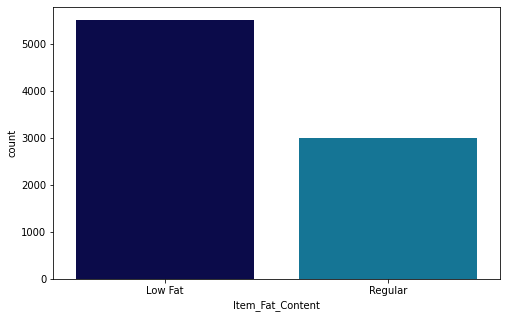

In [244]:
#1. Item_fat_content
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train_df,palette='ocean')

# Observation 
1. Low fat product largly bought

D:\Projects_new\Stores_Sales_Prediction\sales_prize\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

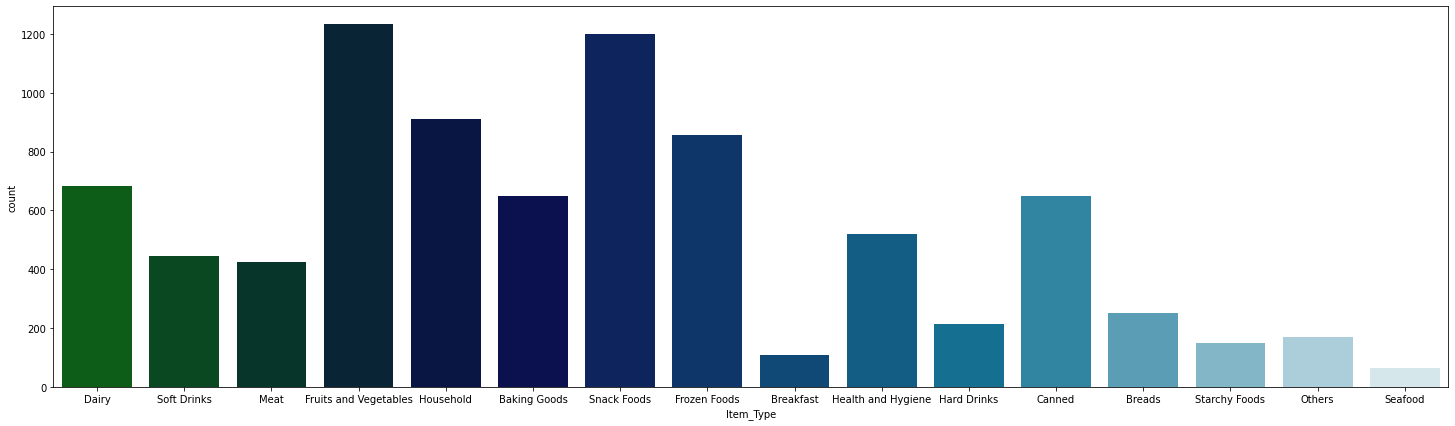

In [248]:
#2. Item_type
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=train_df,palette='ocean')

# Observation 
1. Fruits and vegetables are sold 
2. snaks food are importat

D:\Projects_new\Stores_Sales_Prediction\sales_prize\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

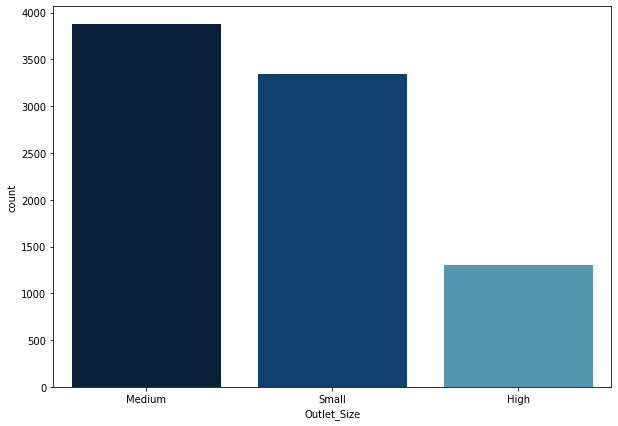

In [249]:
#3.Outlet_Size
plt.figure(figsize=(10,7))
sns.countplot('Outlet_Size',data=train_df,palette='ocean')

# Observation 
1. Medium outlet has many customers 


D:\Projects_new\Stores_Sales_Prediction\sales_prize\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

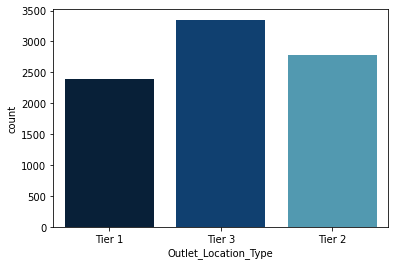

In [252]:
#4. 'Outlet_Location_Type'
sns.countplot('Outlet_Location_Type',data=train_df,palette='ocean')

# Observation 
1. tier 3 location has many customers 


D:\Projects_new\Stores_Sales_Prediction\sales_prize\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

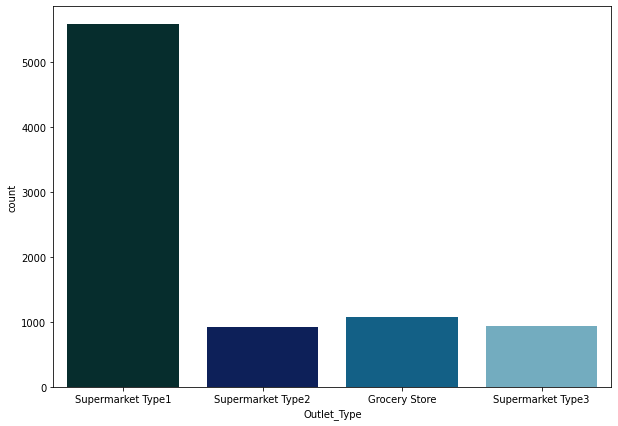

In [256]:
#5.. 'Outlet_Type'
plt.figure(figsize=(10,7))
sns.countplot('Outlet_Type',data=train_df,palette='ocean')

# Observation 
1. Type 1 supermarket  has many customers 


# Bivariate Analysis

In [258]:
train_df.columns

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Item_Weight', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size',
       'Years_Established'],
      dtype='object')

D:\Projects_new\Stores_Sales_Prediction\sales_prize\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

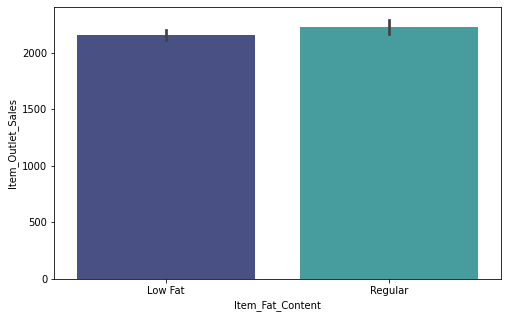

In [261]:
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=train_df,palette='mako')